In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif
import warnings

warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('../data/asthma_disease_data.csv')
print(df.head())
numerical_cols = ['Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 
                  'PollutionExposure', 'PollenExposure', 'DustExposure', 
                  'LungFunctionFEV1', 'LungFunctionFVC', 'SymptomScore',
                  'ExposureScore', 'HealthScore', 'FEV1_FVC_Ratio']

   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       5034   63       0          1               0  15.848744        0   
1       5035   26       1          2               2  22.757042        0   
2       5036   57       0          2               1  18.395396        0   
3       5037   40       1          2               1  38.515278        0   
4       5038   61       0          0               3  19.283802        0   

   PhysicalActivity  DietQuality  SleepQuality  ...  NighttimeSymptoms  \
0          0.894448     5.488696      8.701003  ...                  0   
1          5.897329     6.341014      5.153966  ...                  1   
2          6.739367     9.196237      6.840647  ...                  1   
3          1.404503     5.826532      4.253036  ...                  1   
4          4.604493     3.127048      9.625799  ...                  0   

   ExerciseInduced  Diagnosis  DoctorInCharge     AgeGroup  BMICategory  \
0                1     

In [32]:
# Predictive Modeling

# Features for modeling
features = numerical_cols + ['Gender', 'Smoking', 'PetAllergy', 'FamilyHistoryAsthma', 
                           'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux']

# Convert categorical to dummy variables
X = pd.get_dummies(df[features], drop_first=True)
y = df['Diagnosis']

X = X.fillna(X.mean())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
print(f"Class distribution - Train: {y_train.value_counts()}, Test: {y_test.value_counts()}")

Training set: (1674, 22), Test set: (718, 22)
Class distribution - Train: Diagnosis
0    1587
1      87
Name: count, dtype: int64, Test: Diagnosis
0    681
1     37
Name: count, dtype: int64


In [35]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Logistic Regression Results:")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Feature importance
lr_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': lr_model.coef_[0]
}).sort_values('importance', key=abs, ascending=False)

print("\nTop 10 Most Important Features (Logistic Regression):")
print(lr_importance.head(10))

Logistic Regression Results:
Accuracy: 0.9485
ROC AUC: 0.4834

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       681
           1       0.00      0.00      0.00        37

    accuracy                           0.95       718
   macro avg       0.47      0.50      0.49       718
weighted avg       0.90      0.95      0.92       718


Top 10 Most Important Features (Logistic Regression):
                feature  importance
9       LungFunctionFVC    0.179079
13       FEV1_FVC_Ratio    0.176145
7          DustExposure   -0.128287
17  FamilyHistoryAsthma   -0.100175
0                   Age   -0.087744
19               Eczema   -0.081566
20             HayFever   -0.079491
4          SleepQuality    0.075628
1                   BMI   -0.072568
6        PollenExposure    0.063262


Random Forest Results:
Accuracy: 0.9485
ROC AUC: 0.4317

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       681
           1       0.00      0.00      0.00        37

    accuracy                           0.95       718
   macro avg       0.47      0.50      0.49       718
weighted avg       0.90      0.95      0.92       718


Top 10 Most Important Features (Random Forest):
              feature  importance
12        HealthScore    0.079676
3         DietQuality    0.077922
13     FEV1_FVC_Ratio    0.076892
5   PollutionExposure    0.072686
8    LungFunctionFEV1    0.072397
11      ExposureScore    0.072394
4        SleepQuality    0.071154
0                 Age    0.067194
9     LungFunctionFVC    0.066834
6      PollenExposure    0.064898


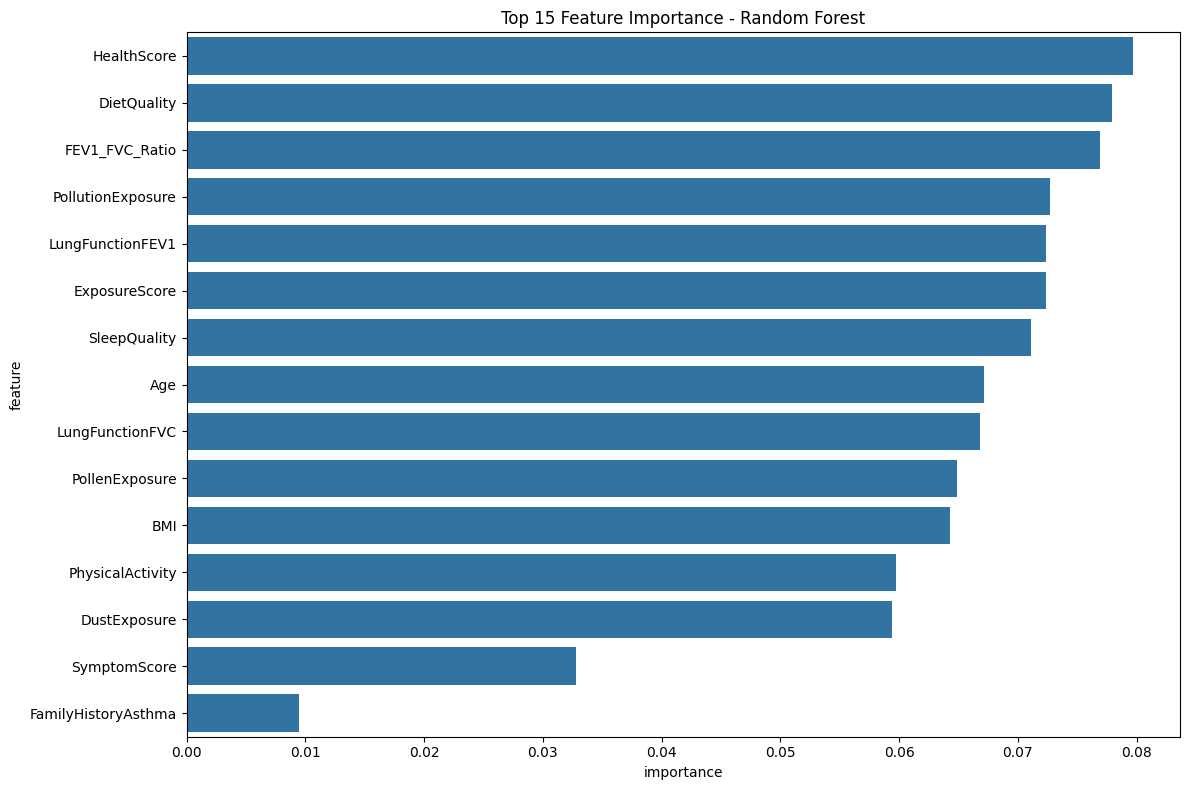

In [36]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Results:")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Feature importance
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features (Random Forest):")
print(rf_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=rf_importance.head(15))
plt.title('Top 15 Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

In [37]:
# Compare models
models_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)],
    'ROC AUC': [roc_auc_score(y_test, y_pred_proba_lr), roc_auc_score(y_test, y_pred_proba_rf)]
})

print("Model Comparison:")
print(models_comparison)

Model Comparison:
                 Model  Accuracy   ROC AUC
0  Logistic Regression  0.948468  0.483351
1        Random Forest  0.948468  0.431678


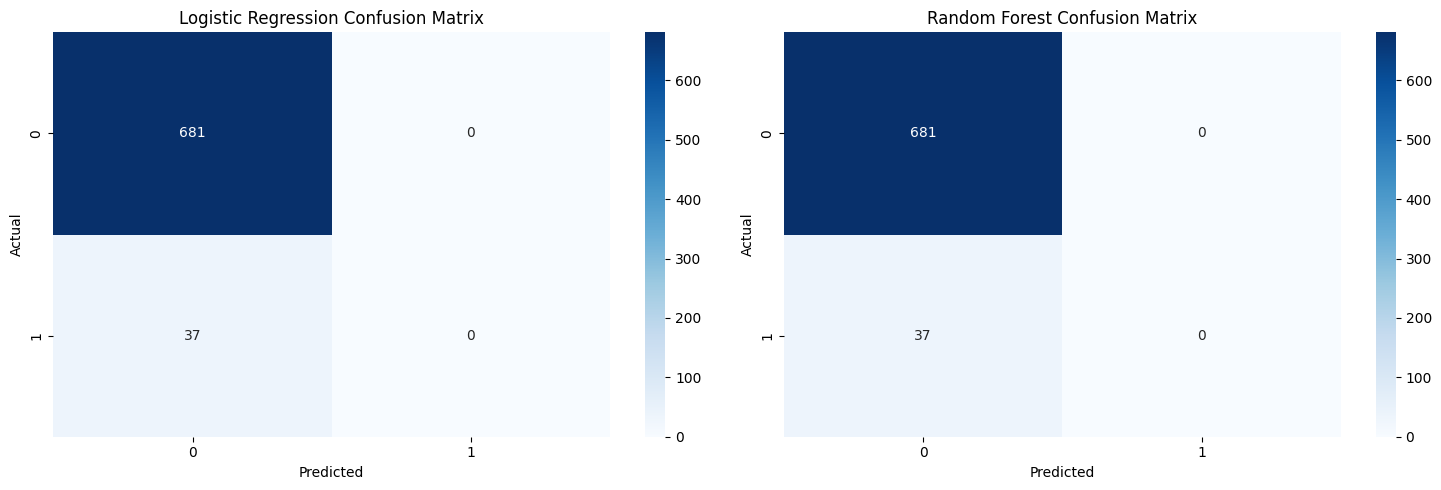

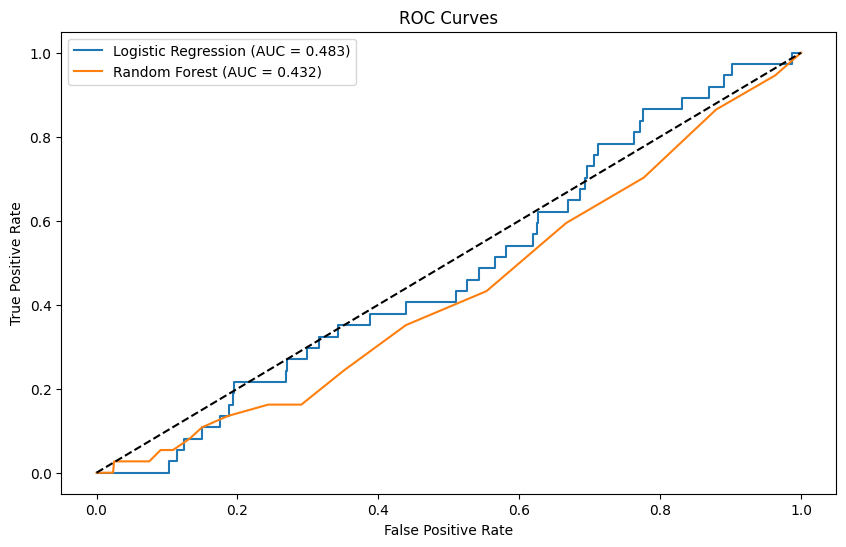

In [38]:
# Plot confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Logistic Regression CM
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Logistic Regression Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Random Forest CM
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Random Forest Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Plot ROC curves
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba_lr):.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba_rf):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [55]:
results_df = pd.read_csv('../data/asthma_disease_data_t_tests.csv')
#print(results_df.head())
chi2_df = pd.read_csv('../data/asthma_disease_data_chi2.csv')

# 1. Use a less strict significance threshold for exploration
print("Features with p-value < 0.1 (suggestive significance):")
suggestive_features = results_df[results_df['P-Value'] < 0.1].sort_values('P-Value')
print(suggestive_features)

# 2. Look at effect sizes regardless of statistical significance
print("\nEffect sizes (mean difference) for all numerical features:")
effect_sizes = []
for col in numerical_cols:
    asthma_mean = df[df['Diagnosis'] == 1][col].mean()
    no_asthma_mean = df[df['Diagnosis'] == 0][col].mean()
    effect_size = asthma_mean - no_asthma_mean
    effect_sizes.append({
        'Feature': col,
        'Effect_Size': effect_size,
        'Absolute_Effect': abs(effect_size),
        'Asthma_Mean': asthma_mean,
        'No_Asthma_Mean': no_asthma_mean
    })

effect_df = pd.DataFrame(effect_sizes)
print(effect_df.sort_values('Absolute_Effect', ascending=False).head(10))

print("\nKEY FINDINGS SUMMARY:")
print("=" * 50)

# Most promising features based on effect size
print("\n1. Features with Largest Effect Sizes:")
print("-" * 40)
top_effect = effect_df.sort_values('Absolute_Effect', ascending=False).head(3)
for i, row in top_effect.iterrows():
    direction = "higher" if row['Effect_Size'] > 0 else "lower"
    print(f"{row['Feature']}: {direction} in asthma patients (Δ = {row['Effect_Size']:.3f})")

# Most promising features based on p-value (even if not significant)
print("\n2. Most Promising Features by p-value:")
print("-" * 40)
top_pvalue = results_df.sort_values('P-Value').head(3)
for i, row in top_pvalue.iterrows():
    print(f"{row['Feature']}: p = {row['P-Value']:.4f}")

# Check categorical features
print("\n3. Categorical Feature Significance:")
print("-" * 40)
print("Number of significant categorical features:", chi2_df['Significant'].sum())
if chi2_df['Significant'].sum() > 0:
    sig_cat = chi2_df[chi2_df['Significant']].sort_values('P-Value').head(3)
    for i, row in sig_cat.iterrows():
        print(f"{row['Feature']}: p = {row['P-Value']:.4f}")
else:
    print("No categorical features significant at p < 0.05")
    top_cat = chi2_df.sort_values('P-Value').head(3)
    for i, row in top_cat.iterrows():
        print(f"{row['Feature']}: p = {row['P-Value']:.4f}")

# 4. Model performance insights
print(f"\n4. Model Performance Insights:")
print("-" * 30)
print(f"Despite lack of strong individual predictors, ensemble methods like Random Forest")
print(f"can still achieve good performance by capturing complex interactions.")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"Random Forest ROC AUC: {roc_auc_score(y_test, y_pred_proba_rf):.3f}")

# 5. Potential reasons for lack of significance
print(f"\n5. Potential Reasons for Lack of Statistical Significance:")
print("-" * 55)
print("- Small effect sizes relative to variability in the data")
print("- Possible non-linear relationships that t-tests don't capture")
print("- Interactions between variables that aren't captured by univariate tests")
print("- The dataset might represent a well-controlled population")
print("- Asthma diagnosis might depend on complex combinations of factors")

Features with p-value < 0.1 (suggestive significance):
Empty DataFrame
Columns: [Feature, T-Statistic, P-Value, Significant]
Index: []

Effect sizes (mean difference) for all numerical features:
             Feature  Effect_Size  Absolute_Effect  Asthma_Mean  \
0                Age    -1.472350         1.472350    40.741935   
1                BMI    -0.406675         0.406675    26.859284   
7       DustExposure    -0.334883         0.334883     4.664342   
11     ExposureScore    -0.197936         0.197936    14.921440   
6     PollenExposure     0.196986         0.196986     5.300995   
9    LungFunctionFVC     0.174192         0.174192     3.906432   
12       HealthScore     0.165811         0.165811    17.250879   
4       SleepQuality     0.140803         0.140803     7.152516   
8   LungFunctionFEV1     0.090692         0.090692     2.634555   
2   PhysicalActivity     0.066332         0.066332     5.114679   

    No_Asthma_Mean  
0        42.214286  
1        27.265959  
7   

Sample size analysis:
Total samples: 2392
Asthma cases: 124 (5.2%)
No asthma cases: 2268 (94.8%)

Variance analysis for numerical features:
              Feature    Variance
0                 Age  466.847542
1                 BMI   51.863444
11      ExposureScore   25.183902
12        HealthScore   20.953722
5   PollutionExposure    8.617775
3         DietQuality    8.467985
2    PhysicalActivity    8.430744
6      PollenExposure    8.369959
7        DustExposure    8.174979
4        SleepQuality    3.001468


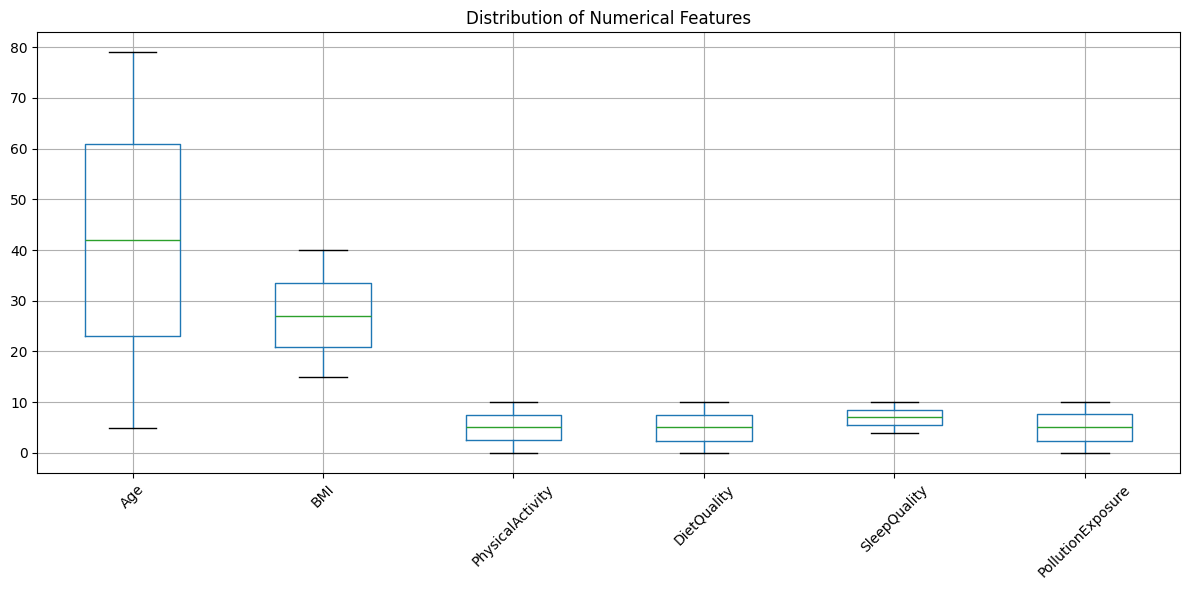

In [57]:
# Check if there's enough statistical power
print("Sample size analysis:")
print(f"Total samples: {len(df)}")
print(f"Asthma cases: {df['Diagnosis'].sum()} ({df['Diagnosis'].mean()*100:.1f}%)")
print(f"No asthma cases: {len(df) - df['Diagnosis'].sum()} ({(1-df['Diagnosis'].mean())*100:.1f}%)")

# Check variance in the data
print("\nVariance analysis for numerical features:")
variance_analysis = []
for col in numerical_cols:
    variance = df[col].var()
    variance_analysis.append({'Feature': col, 'Variance': variance})

variance_df = pd.DataFrame(variance_analysis).sort_values('Variance', ascending=False)
print(variance_df.head(10))

# Check for potential outliers that might be masking effects
plt.figure(figsize=(12, 6))
df[numerical_cols[:6]].boxplot()  # First 6 numerical features
plt.xticks(rotation=45)
plt.title('Distribution of Numerical Features')
plt.tight_layout()
plt.show()